# Setup
> Note: Colab only

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!mkdir ./dataset
!cp -r /content/drive/MyDrive/Capstone/dataset/infected /content/drive/MyDrive/Capstone/dataset/normal -t ./dataset

# Data Processing

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from io import BytesIO
from ipywidgets import widgets
from google.colab import files

In [7]:
DATASET_PATH = './dataset'

In [36]:
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    image_size=(150, 150),
    label_mode='binary',
    validation_split=0.3,
    subset='both',
    batch_size=10,
    seed=8
)

Found 213 files belonging to 2 classes.
Using 150 files for training.
Using 63 files for validation.


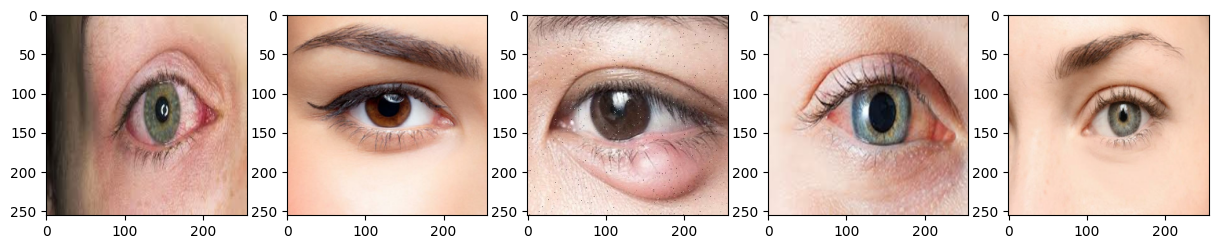

In [26]:
imgs = list(train_ds.take(5))[0][0]

plot, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

for i, ax in enumerate(axes):
  ax.imshow(tf.keras.utils.array_to_img(imgs[i]))

# Model Training

In [62]:
tf.keras.backend.clear_session()

In [63]:
model_aug = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150, 150, 3)),
    tf.keras.layers.RandomFlip('vertical'),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.1),
])

In [64]:
model = tf.keras.models.Sequential([
    model_aug,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [65]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.fit(
    train_ds,
    epochs=10,
    batch_size=25,
    validation_data=val_ds
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 603ms/step - accuracy: 0.4467 - loss: 2.9789 - val_accuracy: 0.4444 - val_loss: 0.7208
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.5675 - loss: 0.6744 - val_accuracy: 0.4603 - val_loss: 0.7225
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step - accuracy: 0.5636 - loss: 0.7094 - val_accuracy: 0.5873 - val_loss: 0.6618
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 485ms/step - accuracy: 0.4887 - loss: 0.6716 - val_accuracy: 0.7460 - val_loss: 0.6523
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 446ms/step - accuracy: 0.6565 - loss: 0.6974 - val_accuracy: 0.6032 - val_loss: 0.6230
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - accuracy: 0.6492 - loss: 0.6347 - val_accuracy: 0.7619 - val_loss: 0.5348
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 593ms/step - accuracy: 0.6845 - loss: 0.5795 - val_accuracy: 0.6984 - val_loss: 0.5246
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.7128 - loss: 0.5558 - val_accuracy

# Testing

Saving normal45.jpg to normal45.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Probability: 0.9861067533493042
Prediction: Normal


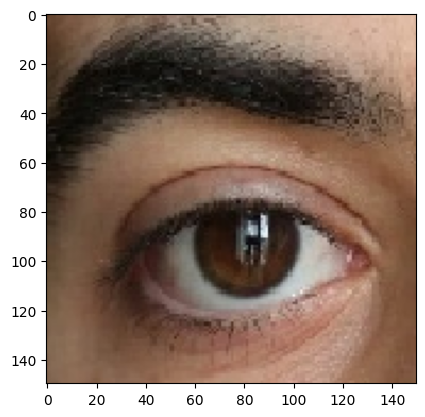

In [72]:
uploaded = files.upload()

for f in uploaded.keys():
  classes = ['Infected', 'Normal']

  img = tf.keras.preprocessing.image.load_img(f, target_size=(150, 150))

  plt.imshow(img)

  img = tf.keras.utils.img_to_array(img)
  img = tf.expand_dims(img, axis=0)

  prediction = model.predict(img)[0][0]

  print(f'Probability: {prediction}')

  if prediction > 0.5:
    print(f'Prediction: {classes[1]}')
  else:
    print(f'Prediction: {classes[0]}')